<div style="font-family:verdana; word-spacing:1.5px;">
<h2><p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;"> Introduction</p></h2>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    
<b>Objective</b><br>
    
    
We are tasked to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 
<br>   
    
<b>About the Dataset</b>   <br>
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. 
    <br>
    Working as a data scientist with the analytics vertical of Scaler, we got this dataset from the Scaler database.<br><br>
      The dataset contains following features:
    <ul>
     <li> Product Purchased: 	KP281, KP481, or KP781
 <li>   Age: 	In years
 <li>   Gender: 	Male/Female
 <li>   Education: 	In years
 <li>   MaritalStatus: 	Single or partnered
 <li>   Usage: 	The average number of times the customer plans to use the treadmill each week.
 <li>   Income: 	Annual income (in $)
 <li>   Fitness: 	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
 <li>   Miles: 	The average number of miles the customer expects to walk/run each week



</ul><br>
There are 180 data points and 9 features.
<br><br>
    
<b>Expected points :</b><br>
<ul>
    <li> Customer Segmentation
    <li> EDA
</ul>

</div>  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [3]:
print("Dimensions of dataset ",data.shape)

data.head()

Dimensions of dataset  (180, 9)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<b> Checking for Null Values in dataset</b>

In [5]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Data contains nno null values.
    </p>
    </div>

In [6]:
data['Product'] = data['Product'].replace({'KP281':'A', 'KP481':'B', 'KP781':'C'})

In [7]:
for i in data.columns:
    print(i,' : ', data[i].nunique())

Product  :  3
Age  :  32
Gender  :  2
Education  :  8
MaritalStatus  :  2
Usage  :  6
Fitness  :  5
Income  :  62
Miles  :  37


<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Type of features:
    <ul>
        <li> Categorical features -> [Product ,Gender, Education, MaritalStatus, Usage, Fitness]
        <li> Continous features -> [Age, Income, Miles] 
    </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
<h3><p style="background-color:#33e0ff;color:white;text-align:center;font-size:175%;padding: 10px;">EDA</p></h3>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    <h4><p style="text-align:center;font-size:125%;padding: 10px;"><b>Univariate Analysis</b></p></h4>
    </div>

<h3><b>Checking Distribution for Continuous features</b></h3>

In [8]:
contin_columns = ['Age', 'Income', 'Miles']

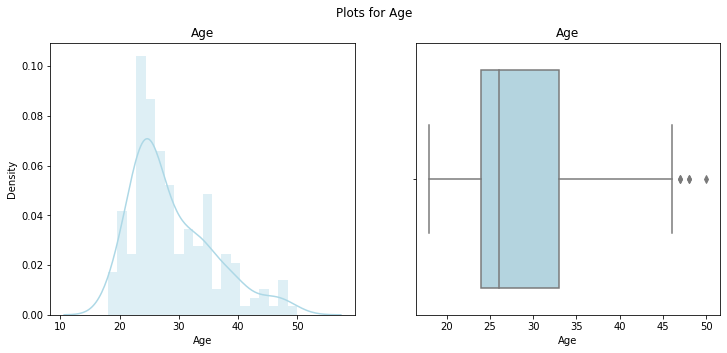

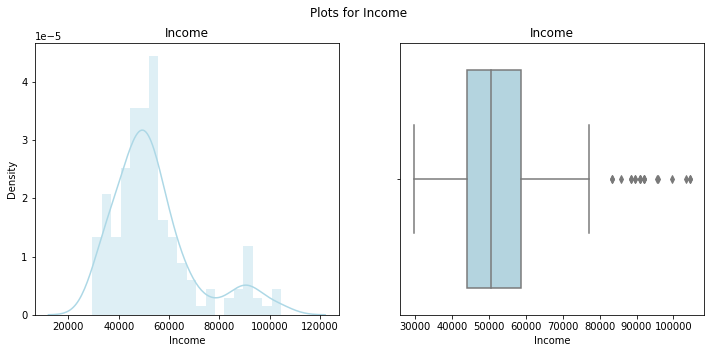

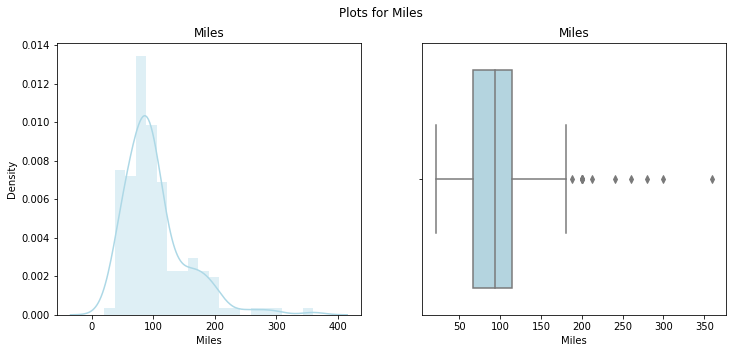

In [9]:
for i in contin_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle('Plots for '+i)
    sns.distplot(data[i],bins=20,ax=ax[0],color='lightblue').set(title = i)
    sns.boxplot(data[i],ax=ax[1],color='lightblue').set(title = i)
    plt.show()

<h3><b>Insights</b></h3>

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    <ul>
        <li> There are outliers present in [Age, Income, Miles].
        <li> Age - follows right tailed normal distribution.
        <li> Income - follows bimodal normal distribution with two peaks.
        <li> Miles - follows right tailed normal distribution.
    </p>
    </div>

<h3><b>Outliers Removal </b></h3>

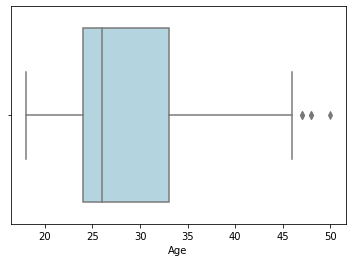

In [10]:
col = 'Age'

#data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='lightblue')
plt.show()


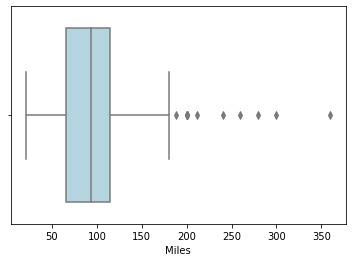

In [11]:
col = 'Miles'
#data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='lightblue')
plt.show()


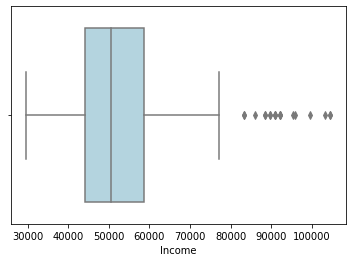

In [12]:
col = 'Income'
#data[col] = data[col].clip(lower=data[col].quantile(0.25), upper=data[col].quantile(0.75))

sns.boxplot(x=data[col],color='lightblue')
plt.show()


In [13]:
cols = ['Miles'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
df = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df.shape

(167, 9)

<h3><b>Checking Categorical features</b></h3>

In [15]:
cat_cols = ['Product' ,'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness']

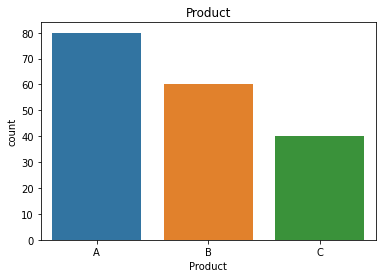

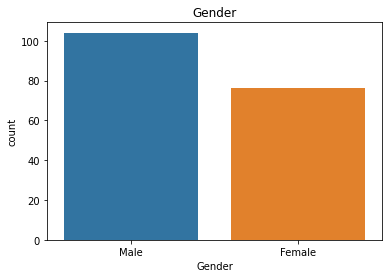

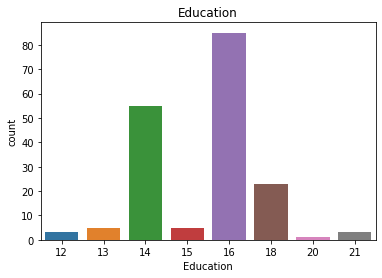

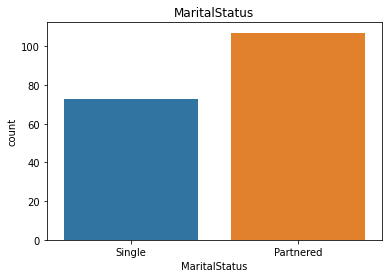

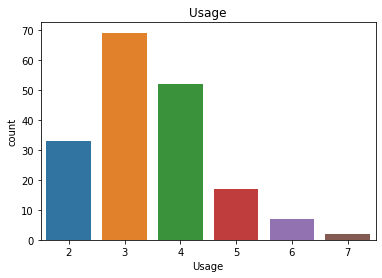

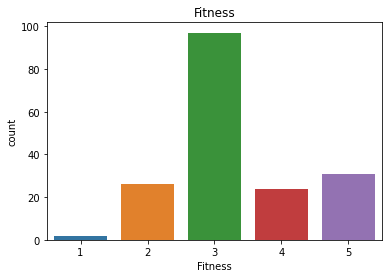

In [16]:
for i in cat_cols:
    sns.countplot(data[i]).set(title=i)
    plt.show()
    print()
    print()

<h3><b>Insights</b></h3>

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    <ul>
        <li> Product - Category A is more sold than others 
        <li> Gender - Males have bought more machines than Females
        <li> Education - Category 14 and 16 bought most machines
        <li> MaritalStatus - Parterned Customers have bought more machines than Single.
        <li> Usage - Category 3 and 4 have bought more machines
        <li> Fitness - People with Level 3 bought most machines    
    </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
   <h4> <p style="text-align:center;font-size:125%;padding: 10px;"><b>Multivariate Analysis</b></p></h4>
    </div>

In [17]:
def create_contigency(col1,col2,data):
    df = pd.crosstab(data[col1],data[col2], normalize='index')
    print("Conditional Probability : P({}|{})".format(col2,col1))
    display(df)
    
    print()
    print()
    
    df = pd.crosstab(data[col1],data[col2], normalize='columns')
    print("Conditional Probability : P({}|{})".format(col1,col2))
    display(df)
    
    
    df = pd.crosstab(data[col1],data[col2],margins=True)
   
    display(df)
    
    print()

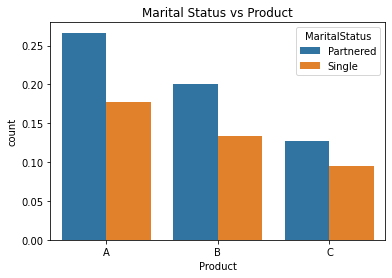

In [18]:
tmp = data[['MaritalStatus','Product']]
tmp['count'] = 1
tmp = tmp.groupby(['MaritalStatus','Product']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='MaritalStatus',y='count',x='Product').set(title='Marital Status vs Product')
plt.show()

In [19]:
print("Contingency Table :")
print()
create_contigency('MaritalStatus','Product',data)

Contingency Table :

Conditional Probability : P(Product|MaritalStatus)


Product,A,B,C
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877




Conditional Probability : P(MaritalStatus|Product)


Product,A,B,C
MaritalStatus,,,
Partnered,0.6,0.6,0.575
Single,0.4,0.4,0.425


Product,A,B,C,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


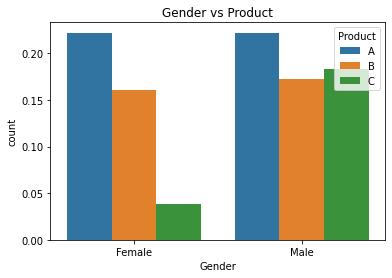

In [20]:
tmp = data[['Gender','Product']]
tmp['count'] = 1
tmp = tmp.groupby(['Gender','Product']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,x='Gender',y='count',hue='Product').set(title='Gender vs Product')
plt.show()

In [21]:
print("Contingency Table :")
print()
create_contigency('Gender','Product',data)

Contingency Table :

Conditional Probability : P(Product|Gender)


Product,A,B,C
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308




Conditional Probability : P(Gender|Product)


Product,A,B,C
Gender,,,
Female,0.5,0.483333,0.175
Male,0.5,0.516667,0.825


Product,A,B,C,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


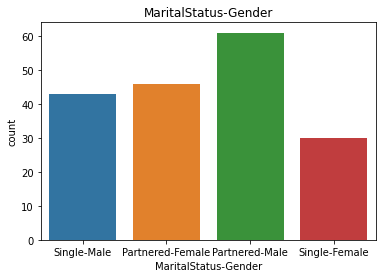

In [22]:
cols = ['MaritalStatus','Gender']
tmp = data[cols]

name = "-".join(cols)
tmp[name] = tmp['MaritalStatus'] + '-' + tmp['Gender']

sns.countplot(data=tmp,x=name).set(title=name)
plt.show()

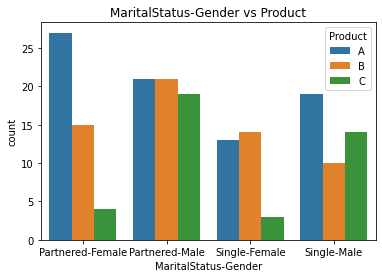

In [23]:
cols = ['MaritalStatus','Gender']



tmp = data[cols+['Product']]

name = "-".join(cols)

tmp[name] = tmp['MaritalStatus'] + '-' + tmp['Gender']
tmppk = tmp.copy()
tmp['count'] = 1
tmp = tmp.groupby([name,'Product']).count()['count'].reset_index()
tmp
sns.barplot(data=tmp,x=name,hue='Product',y='count').set(title=name +' vs Product')
plt.show()

In [24]:
print("Contingency Table :")
create_contigency('MaritalStatus-Gender','Product',tmppk)

Contingency Table :
Conditional Probability : P(Product|MaritalStatus-Gender)


Product,A,B,C
MaritalStatus-Gender,,,
Partnered-Female,0.586957,0.326087,0.086957
Partnered-Male,0.344262,0.344262,0.311475
Single-Female,0.433333,0.466667,0.100000
Single-Male,0.441860,0.232558,0.325581




Conditional Probability : P(MaritalStatus-Gender|Product)


Product,A,B,C
MaritalStatus-Gender,,,
Partnered-Female,0.3375,0.250000,0.100
Partnered-Male,0.2625,0.350000,0.475
Single-Female,0.1625,0.233333,0.075
Single-Male,0.2375,0.166667,0.350


Product,A,B,C,All
MaritalStatus-Gender,,,,
Partnered-Female,27,15,4,46
Partnered-Male,21,21,19,61
Single-Female,13,14,3,30
Single-Male,19,10,14,43
All,80,60,40,180


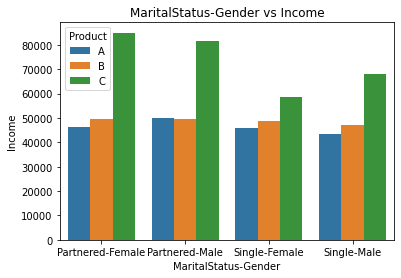

In [25]:
cols = ['MaritalStatus','Gender']

name = "-".join(cols)


tmp = data[cols+['Product','Income']]
tmp[name] = tmp['MaritalStatus'] + '-' + tmp['Gender']

tmp = tmp.groupby([name,'Product']).mean()['Income'].reset_index()

sns.barplot(data=tmp,x=name,hue='Product',y='Income').set(title=name +' vs Income')
plt.show()

<AxesSubplot:xlabel='Age_grp', ylabel='count'>

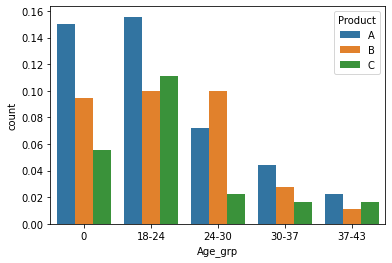

In [26]:
col = 'Age'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1])) + '-' + str(int(grps[i]))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmmppk = tmp.copy()
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

In [27]:
print("Contingency Table :")
create_contigency('Age_grp','Product',data)

Contingency Table :
Conditional Probability : P(Product|Age_grp)


Product,A,B,C
Age_grp,,,
0,0.500000,0.314815,0.185185
18-24,0.424242,0.272727,0.303030
24-30,0.371429,0.514286,0.114286
30-37,0.500000,0.312500,0.187500
37-43,0.444444,0.222222,0.333333




Conditional Probability : P(Age_grp|Product)


Product,A,B,C
Age_grp,,,
0,0.3375,0.283333,0.250
18-24,0.3500,0.300000,0.500
24-30,0.1625,0.300000,0.100
30-37,0.1000,0.083333,0.075
37-43,0.0500,0.033333,0.075


Product,A,B,C,All
Age_grp,,,,
0,27,17,10,54
18-24,28,18,20,66
24-30,13,18,4,35
30-37,8,5,3,16
37-43,4,2,3,9
All,80,60,40,180


<AxesSubplot:xlabel='Income_grp', ylabel='count'>

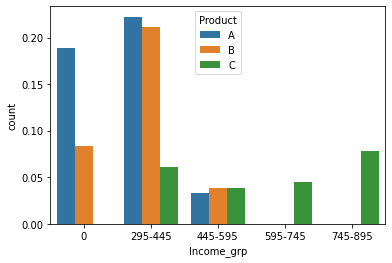

In [28]:
col = 'Income'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1]/100)) + '-' + str(int(grps[i]/100))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()

total = sum(tmp['count'])
tmp['count'] = tmp['count']/total

sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

In [29]:
print("Contingency Table :")
create_contigency('Income_grp','Product',data)

Contingency Table :
Conditional Probability : P(Product|Income_grp)


Product,A,B,C
Income_grp,,,
0,0.693878,0.306122,0.000000
295-445,0.449438,0.426966,0.123596
445-595,0.300000,0.350000,0.350000
595-745,0.000000,0.000000,1.000000
745-895,0.000000,0.000000,1.000000




Conditional Probability : P(Income_grp|Product)


Product,A,B,C
Income_grp,,,
0,0.425,0.250000,0.000
295-445,0.500,0.633333,0.275
445-595,0.075,0.116667,0.175
595-745,0.000,0.000000,0.200
745-895,0.000,0.000000,0.350


Product,A,B,C,All
Income_grp,,,,
0,34,15,0,49
295-445,40,38,11,89
445-595,6,7,7,20
595-745,0,0,8,8
745-895,0,0,14,14
All,80,60,40,180


<AxesSubplot:xlabel='Miles_grp', ylabel='count'>

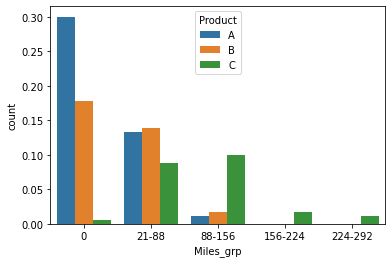

In [30]:
col = 'Miles'

est = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy="uniform")
est.fit(data[col].values.reshape(-1, 1))

Xt = est.transform(data[col].values.reshape(-1, 1))
data[col+'_grp'] = Xt
data[col+'_grp'] = data[col+'_grp'].astype(int)
grps = list(est.bin_edges_[0])
mapping = {}
for i in range(1,len(grps)):
    mapping[i] = str(int(grps[i-1])) + '-' + str(int(grps[i]))
    
data[col+'_grp'] = data[col+'_grp'].replace(mapping)

tmp = data[['Product',col+'_grp']]
tmp['count'] = 1
tmp = tmp.groupby(['Product',col+'_grp']).sum()['count'].reset_index()
total = sum(tmp['count'])
tmp['count'] = tmp['count']/total
sns.barplot(data=tmp,hue='Product',y='count',x=col+'_grp')

In [31]:
print("Contingency Table :")
create_contigency('Miles_grp','Product',data)

Contingency Table :
Conditional Probability : P(Product|Miles_grp)


Product,A,B,C
Miles_grp,,,
0,0.620690,0.367816,0.011494
156-224,0.000000,0.000000,1.000000
21-88,0.369231,0.384615,0.246154
224-292,0.000000,0.000000,1.000000
88-156,0.086957,0.130435,0.782609




Conditional Probability : P(Miles_grp|Product)


Product,A,B,C
Miles_grp,,,
0,0.675,0.533333,0.025
156-224,0.000,0.000000,0.075
21-88,0.300,0.416667,0.400
224-292,0.000,0.000000,0.050
88-156,0.025,0.050000,0.450


Product,A,B,C,All
Miles_grp,,,,
0,54,32,1,87
156-224,0,0,3,3
21-88,24,25,16,65
224-292,0,0,2,2
88-156,2,3,18,23
All,80,60,40,180


<AxesSubplot:xlabel='Product', ylabel='count'>

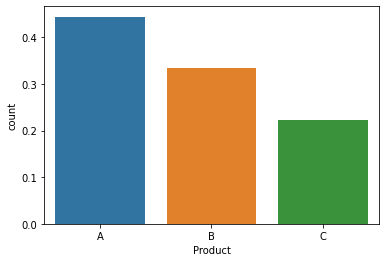

In [32]:
tmp = data[['Product']]
tmp['count'] =1

tmp = tmp.groupby('Product').sum()['count'].reset_index()

total = sum(tmp['count'])
tmp['count'] = tmp['count']/total
sns.barplot(data=tmp,x='Product',y='count')

In [33]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_grp,Income_grp,Miles_grp
0,A,18,Male,14,Single,3,4,29562,112,0,0,21-88
1,A,19,Male,15,Single,2,3,31836,75,0,0,0
2,A,19,Female,14,Partnered,4,3,30699,66,0,0,0
3,A,19,Male,12,Single,3,3,32973,85,0,0,0
4,A,20,Male,13,Partnered,4,2,35247,47,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,C,40,Male,21,Single,6,5,83416,200,30-37,595-745,88-156
176,C,42,Male,18,Single,5,4,89641,200,30-37,745-895,88-156
177,C,45,Male,16,Single,5,5,90886,160,37-43,745-895,88-156
178,C,47,Male,18,Partnered,4,5,104581,120,37-43,745-895,21-88


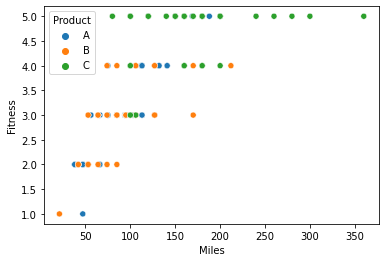

In [34]:
sns.scatterplot(data=data,x='Miles',y='Fitness',hue='Product')
plt.show()

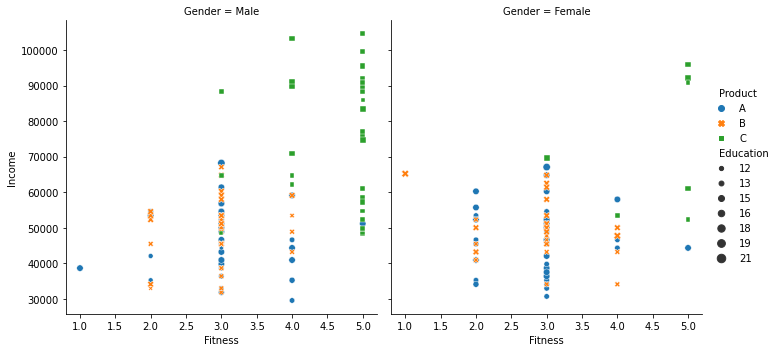

In [35]:
sns.relplot(
    data=data,
    x="Fitness", y="Income", col="Gender",
    hue="Product", style="Product", size="Education",
)

plt.show()

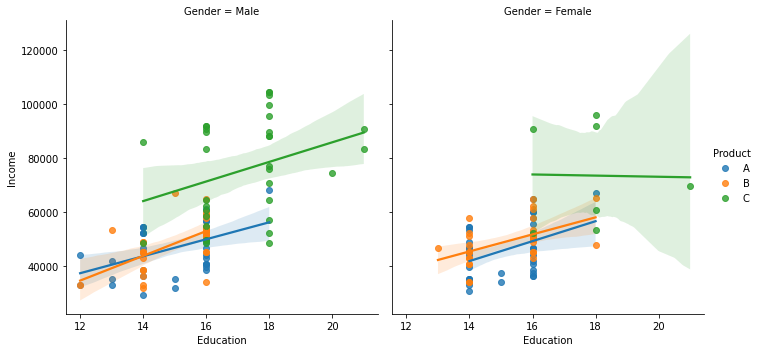

In [36]:
sns.lmplot(data=data, y="Income", x="Education", col="Gender", hue="Product")
plt.show()

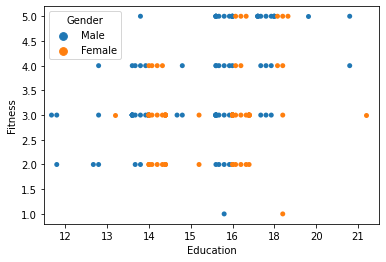

In [37]:
ax = sns.swarmplot(x="Education", y="Fitness", data=data,dodge=True,hue='Gender')
plt.show()

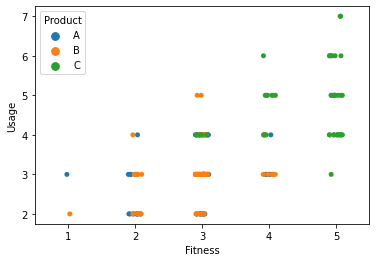

In [38]:
ax = sns.stripplot(x="Fitness", y="Usage", hue="Product", data=data)
plt.show()

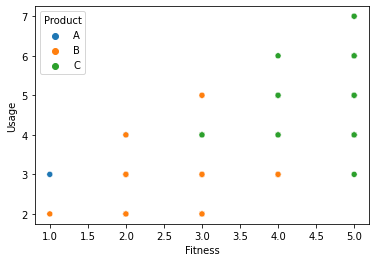

In [39]:
ax = sns.scatterplot(x="Fitness", y="Usage", hue="Product", data=data)
plt.show()

<div style="font-family:verdana; word-spacing:1.5px;">
    <p style="text-align:center;font-size:125%;padding: 10px;"><b>Actions and Insights</b></p>
    </div>

<div style="display:fill;
           border-radius:5px;
           background-color:#BDE6ED;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    <b>Insights</b>:
    <ul>
        <li> Partnered and Single users have much higher probability of buying machine A.
 <li> Females have most preference for machine A and least for C.
 <li> Males seem to have almost equal preference for all machines.
 <li> Partnered-Female have very high preference for Machine A.
 <li> Age group between 18-24 prefer Machine A.
 <li> Age group between 24-30 prefer Machine B.
 <li> Age group between 30-37 prefer Machine B.
 <li>  Age group between 37-43 prefer Machine A.
 <li> Customers with salary >60000  tend to buy Machine C almost always.
 <li> Customers with salary = 0  tend to buy Machine A most of the times.
 <li> Customers with miles >88  tend to buy Machine C almost always.
     <li> Customers with above average Fitness and Usage tend to go for Machine C.
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <b>Actions</b>:
    <ul>
        <li> We can target Machine C for customers who regularly excercise and are fit, as they might be more willing to invest in health equipments.
            <li> Females tend to buy Machine A more, so they could be targeted for same.
                <li> People with high income should be targeted for Machine C.
                    <li> People with hogher usage should be targeted for Machine C.
                     <li> People between Age 24 to 40 should be targeted for Machine B.
                         <li>  People between Age less than 24 should be targeted for Machine A.
    </p>
    </div>